In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('../data/gdf_roads.csv')

In [3]:
df.head()

,Link no,Name,Start location-LRP,Start location-Offset,Start location-Chainage,End location-LRP,End location-Offset,End location-Chainage,Length-(Km),Traffic Data-Heavy Truck,...,Traffic Data-Motor Cycle,Traffic Data-Bi-Cycle,Traffic Data-Cycle Rickshaw,Traffic Data-Cart,Total-Motorized,Total-Non Motorized,Total-Total AADT,Traffic-(AADT),start_geometry,end_geometry
0,N1-1L,Jatrabari - Int.with Z1101 (Left) (Left),LRPS,0,0.000,LRPS,822,0.822,0.822,402.0,...,398.0,232.0,889.0,0.0,18236.0,1121.0,19357.0,19357.0,POINT (90.443333 23.7060278),POINT (90.4504722 23.7027778)
1,N1-1R,Jatrabari - Int.with Z1101 (Left) (Right),LRPS,0,0.000,LRPS,822,0.822,0.822,660.0,...,436.0,213.0,1088.0,0.0,20236.0,1301.0,21537.0,21537.0,POINT (90.443333 23.7060278),POINT (90.4504722 23.7027778)
2,N1-2L,Int.with Z1101 - Signboard (Left) R111 (Left),LRPS,822,0.822,LRPS,4175,4.175,3.353,660.0,...,436.0,213.0,1088.0,0.0,20236.0,1301.0,21537.0,21537.0,POINT (90.4504722 23.7027778),POINT (90.4805271 23.6938052)
3,N1-2R,Int.with Z1101 - Signboard (Left) R111 (Right),LRPS,822,0.822,LRPS,4175,4.175,3.353,402.0,...,398.0,232.0,889.0,0.0,18236.0,1121.0,19357.0,19357.0,POINT (90.4504722 23.7027778),POINT (90.4805271 23.6938052)
4,N1-3L,Signboard - Shimrail (Left)R110 (Left),LRPS,4175,4.175,LRPS,7181,7.181,3.006,91.0,...,1087.0,75.0,1198.0,0.0,16288.0,1273.0,17561.0,17561.0,POINT (90.4805271 23.6938052),POINT (90.5092778 23.6979163)


In [4]:
df['road'] = df['Link no'].str.split('-').str[0]

In [5]:
df.head()

,Link no,Name,Start location-LRP,Start location-Offset,Start location-Chainage,End location-LRP,End location-Offset,End location-Chainage,Length-(Km),Traffic Data-Heavy Truck,...,Traffic Data-Bi-Cycle,Traffic Data-Cycle Rickshaw,Traffic Data-Cart,Total-Motorized,Total-Non Motorized,Total-Total AADT,Traffic-(AADT),start_geometry,end_geometry,road
0,N1-1L,Jatrabari - Int.with Z1101 (Left) (Left),LRPS,0,0.000,LRPS,822,0.822,0.822,402.0,...,232.0,889.0,0.0,18236.0,1121.0,19357.0,19357.0,POINT (90.443333 23.7060278),POINT (90.4504722 23.7027778),N1
1,N1-1R,Jatrabari - Int.with Z1101 (Left) (Right),LRPS,0,0.000,LRPS,822,0.822,0.822,660.0,...,213.0,1088.0,0.0,20236.0,1301.0,21537.0,21537.0,POINT (90.443333 23.7060278),POINT (90.4504722 23.7027778),N1
2,N1-2L,Int.with Z1101 - Signboard (Left) R111 (Left),LRPS,822,0.822,LRPS,4175,4.175,3.353,660.0,...,213.0,1088.0,0.0,20236.0,1301.0,21537.0,21537.0,POINT (90.4504722 23.7027778),POINT (90.4805271 23.6938052),N1
3,N1-2R,Int.with Z1101 - Signboard (Left) R111 (Right),LRPS,822,0.822,LRPS,4175,4.175,3.353,402.0,...,232.0,889.0,0.0,18236.0,1121.0,19357.0,19357.0,POINT (90.4504722 23.7027778),POINT (90.4805271 23.6938052),N1
4,N1-3L,Signboard - Shimrail (Left)R110 (Left),LRPS,4175,4.175,LRPS,7181,7.181,3.006,91.0,...,75.0,1198.0,0.0,16288.0,1273.0,17561.0,17561.0,POINT (90.4805271 23.6938052),POINT (90.5092778 23.6979163),N1


All of the roads by zone is defined based on https://www.rhd.gov.bd/OnlineRoadNetwork/searchbyoffice_2.asp

In [6]:
barisal_roads = [
'N8', 'N801', 'N807', 'N809',
    'R852', 'R870', 'R871', 'R872', 'R880', 'R881', 'R890', 'R891',
    'Z7704', 'Z7706', 'Z7707', 'Z7709', 'Z7710', 'Z7711', 'Z7712', 'Z7715',
    'Z8033', 'Z8034', 'Z8037', 'Z8038', 'Z8040', 'Z8043', 'Z8044', 'Z8047',
    'Z8048', 'Z8049', 'Z8050', 'Z8051', 'Z8052', 'Z8053', 'Z8054', 'Z8055',
    'Z8056', 'Z8057', 'Z8058', 'Z8059', 'Z8062',
    'Z8603', 'Z8703', 'Z8704', 'Z8705', 'Z8706', 'Z8707', 'Z8708', 'Z8709',
    'Z8710', 'Z8713', 'Z8716', 'Z8717', 'Z8740', 'Z8750',
    'Z8801', 'Z8802', 'Z8803', 'Z8804', 'Z8805', 'Z8806',
    'Z8814', 'Z8815', 'Z8905', 'Z8909', 'Z8910', 'Z8911', 'Z8912', 'Z8913',
    'Z8915', 'Z8916', 'Z8917', 'Z8943', 'Z8948'
]

# Create a new column 'Zone' with default 'Unknown'
df['Zone'] = 'Unknown'

# Assign 'Barisal' to matching roads in a column, e.g., 'link_prefix'
df.loc[df['road'].isin(barisal_roads), 'Zone'] = 'Barisal'

In [7]:
barisal_df = df[df['Zone'] == 'Barisal']
print(barisal_df[['Link no', 'road', 'Zone']])


      Link no   road     Zone
534      N8-1     N8  Barisal
535      N8-2     N8  Barisal
536      N8-3     N8  Barisal
537      N8-4     N8  Barisal
538      N8-5     N8  Barisal
...       ...    ...      ...
2061  Z8915-3  Z8915  Barisal
2062  Z8916-1  Z8916  Barisal
2063  Z8916-2  Z8916  Barisal
2064  Z8943-1  Z8943  Barisal
2065  Z8943-2  Z8943  Barisal

[161 rows x 3 columns]


In [8]:
chattogram_roads = [
    'N1', 'N106', 'N107', 'N108', 'N109', 'N110', 'N111', 'N113', 'N115', 'N116',
    'N121', 'N123', 'N124', 'N125', 'N126', 'N127', 'N128', 'N129',
    'R151', 'R152', 'R160', 'R161', 'R162', 'R163', 'R164', 'R170', 'R171', 'R172', 'R180',
    'Z1001', 'Z1002', 'Z1004', 'Z1005', 'Z1006', 'Z1007', 'Z1010', 'Z1011', 'Z1012', 'Z1013',
    'Z1016', 'Z1019', 'Z1021', 'Z1025', 'Z1026', 'Z1031', 'Z1036', 'Z1037', 'Z1039', 'Z1040',
    'Z1054', 'Z1057', 'Z1059', 'Z1065', 'Z1070', 'Z1071', 'Z1075', 'Z1076', 'Z1084', 'Z1086',
    'Z1087', 'Z1088', 'Z1095', 'Z1098', 'Z1099', 'Z1121', 'Z1122', 'Z1123', 'Z1124', 'Z1125',
    'Z1126', 'Z1127', 'Z1128', 'Z1129', 'Z1130', 'Z1131', 'Z1132', 'Z1133', 'Z1135', 'Z1136',
    'Z1137', 'Z1504', 'Z1601', 'Z1602', 'Z1603', 'Z1604', 'Z1605', 'Z1606', 'Z1608', 'Z1610',
    'Z1611', 'Z1612', 'Z1613', 'Z1616', 'Z1617', 'Z1618', 'Z1619', 'Z1620', 'Z1623', 'Z1629',
    'Z1636', 'Z1637', 'Z1703', 'Z1802', 'Z1804', 'Z1806', 'Z1811', 'Z1812', 'Z1813', 'Z1814',
    'Z1815'
]

# Assign 'Barisal' to matching roads in a column, e.g., 'link_prefix'
df.loc[df['road'].isin(chattogram_roads), 'Zone'] = 'Chattogram'

In [9]:
chatto_df = df[df['Zone'] == 'Chattogram']
print(chatto_df[['Link no', 'road', 'Zone']])

      Link no   road        Zone
0       N1-1L     N1  Chattogram
1       N1-1R     N1  Chattogram
2       N1-2L     N1  Chattogram
3       N1-2R     N1  Chattogram
4       N1-3L     N1  Chattogram
...       ...    ...         ...
1297  Z1811-3  Z1811  Chattogram
1298  Z1811-4  Z1811  Chattogram
1299  Z1812-1  Z1812  Chattogram
1300  Z1813-1  Z1813  Chattogram
1301  Z1814-1  Z1814  Chattogram

[281 rows x 3 columns]


In [10]:
cumilla_roads = [
    'N1', 'N101', 'N102', 'N103', 'N104', 'N112', 'N114', 'N119', 'N120', 'N2', 'N213', 'N809',
    'R120', 'R140', 'R141', 'R142', 'R143', 'R144', 'R145', 'R146', 'R147', 'R148', 'R150', 'R203',
    'R220', 'R860',
    'Z1008', 'Z1017', 'Z1022', 'Z1023', 'Z1024', 'Z1027', 'Z1028', 'Z1029', 'Z1030', 'Z1031',
    'Z1032', 'Z1033', 'Z1034', 'Z1035', 'Z1038',
    'Z1041', 'Z1042', 'Z1043', 'Z1044', 'Z1045', 'Z1046', 'Z1047', 'Z1048', 'Z1049', 'Z1050',
    'Z1051', 'Z1052', 'Z1053', 'Z1055', 'Z1056', 'Z1058', 'Z1062', 'Z1069', 'Z1081', 'Z1083',
    'Z1134', 'Z1151', 'Z1201', 'Z1202', 'Z1205', 'Z1206', 'Z1210', 'Z1216', 'Z1219', 'Z1220',
    'Z1221',
    'Z1401', 'Z1402', 'Z1403', 'Z1404', 'Z1405', 'Z1407', 'Z1410', 'Z1411', 'Z1412', 'Z1413',
    'Z1414', 'Z1415', 'Z1416', 'Z1417', 'Z1418', 'Z1420', 'Z1421', 'Z1422', 'Z1423', 'Z1424',
    'Z1425', 'Z1426', 'Z1427', 'Z1428', 'Z1429', 'Z1430', 'Z1431', 'Z1432', 'Z1433', 'Z1434',
    'Z1435', 'Z1436', 'Z1437', 'Z1438', 'Z1439', 'Z1440', 'Z1441', 'Z1442', 'Z1443', 'Z1444',
    'Z1445', 'Z1446', 'Z1447', 'Z1448', 'Z1449', 'Z1450', 'Z1451', 'Z1452', 'Z1453', 'Z1454',
    'Z1455', 'Z1456', 'Z1457', 'Z1458', 'Z1459', 'Z1466', 'Z1472', 'Z1482', 'Z1508', 'Z1510',
    'Z1824', 'Z2031', 'Z8699'
]

df.loc[df['road'].isin(cumilla_roads), 'Zone'] = 'Cumilla'

In [11]:
df.head()

,Link no,Name,Start location-LRP,Start location-Offset,Start location-Chainage,End location-LRP,End location-Offset,End location-Chainage,Length-(Km),Traffic Data-Heavy Truck,...,Traffic Data-Cycle Rickshaw,Traffic Data-Cart,Total-Motorized,Total-Non Motorized,Total-Total AADT,Traffic-(AADT),start_geometry,end_geometry,road,Zone
0,N1-1L,Jatrabari - Int.with Z1101 (Left) (Left),LRPS,0,0.000,LRPS,822,0.822,0.822,402.0,...,889.0,0.0,18236.0,1121.0,19357.0,19357.0,POINT (90.443333 23.7060278),POINT (90.4504722 23.7027778),N1,Cumilla
1,N1-1R,Jatrabari - Int.with Z1101 (Left) (Right),LRPS,0,0.000,LRPS,822,0.822,0.822,660.0,...,1088.0,0.0,20236.0,1301.0,21537.0,21537.0,POINT (90.443333 23.7060278),POINT (90.4504722 23.7027778),N1,Cumilla
2,N1-2L,Int.with Z1101 - Signboard (Left) R111 (Left),LRPS,822,0.822,LRPS,4175,4.175,3.353,660.0,...,1088.0,0.0,20236.0,1301.0,21537.0,21537.0,POINT (90.4504722 23.7027778),POINT (90.4805271 23.6938052),N1,Cumilla
3,N1-2R,Int.with Z1101 - Signboard (Left) R111 (Right),LRPS,822,0.822,LRPS,4175,4.175,3.353,402.0,...,889.0,0.0,18236.0,1121.0,19357.0,19357.0,POINT (90.4504722 23.7027778),POINT (90.4805271 23.6938052),N1,Cumilla
4,N1-3L,Signboard - Shimrail (Left)R110 (Left),LRPS,4175,4.175,LRPS,7181,7.181,3.006,91.0,...,1198.0,0.0,16288.0,1273.0,17561.0,17561.0,POINT (90.4805271 23.6938052),POINT (90.5092778 23.6979163),N1,Cumilla


In [12]:
df['Zone'].unique()

array(['Cumilla', 'Unknown', 'Chattogram', 'Barisal'], dtype=object)

In [13]:
dhaka_roads = [
    'N1', 'N105', 'N117', 'N130', 'N2', 'N201', 'N3', 'N301', 'N302', 'N4', 'N406', 'N5', 'N501', 'N503', 'N511',
    'N530', 'N531', 'N532', 'N540', 'N8', 'N802', 'N810',
    'R110', 'R111', 'R112', 'R113', 'R114', 'R115', 'R116',
    'R201', 'R202', 'R203', 'R210', 'R211', 'R212', 'R213',
    'R301', 'R302', 'R303', 'R304', 'R305', 'R310', 'R311', 'R312', 'R313', 'R314', 'R315', 'R316', 'R317',
    'R503', 'R504', 'R506', 'R801', 'R802', 'R812', 'R813', 'R814', 'R820', 'R821', 'R822',
    'Z1060', 'Z1061', 'Z1063', 'Z1064', 'Z1066', 'Z1067', 'Z1089', 'Z1101', 'Z1102',
    'Z2001', 'Z2032', 'Z2034', 'Z2035', 'Z2036', 'Z2037', 'Z2038', 'Z2041', 'Z2042', 'Z2043',
    'Z2044', 'Z2047', 'Z2048', 'Z2049', 'Z2055', 'Z2063', 'Z2064', 'Z2065', 'Z2066',
    'Z2115', 'Z2121', 'Z2122', 'Z2123',
    'Z3002', 'Z3003', 'Z3004', 'Z3005', 'Z3006', 'Z3007', 'Z3008', 'Z3009', 'Z3010', 'Z3012',
    'Z3024', 'Z3025', 'Z3026',
    'Z4006',
    'Z5044',
    'Z5062', 'Z5063', 'Z5064', 'Z5065', 'Z5066', 'Z5067', 'Z5069',
    'Z8002', 'Z8003', 'Z8004', 'Z8005', 'Z8009',
    'Z8121',
    'Z8201', 'Z8203', 'Z8204', 'Z8205', 'Z8206', 'Z8207', 'Z8208', 'Z8209'
]

df.loc[df['road'].isin(dhaka_roads), 'Zone'] = 'Dhaka'

In [14]:
gopalganj_roads = [
    'N7', 'N701', 'N8', 'N803', 'N804', 'N805', 'N806', 'N808',
    'R710', 'R711', 'R712', 'R850', 'R851', 'R852', 'R860', 'R861', 'R862', 'R863',
    'Z7001', 'Z7002', 'Z7004', 'Z7006', 'Z7102', 'Z7106', 'Z7108', 'Z7704',
    'Z8013', 'Z8014', 'Z8021', 'Z8023', 'Z8032', 'Z8035', 'Z8036',
    'Z8065', 'Z8067',
    'Z8401', 'Z8402', 'Z8404', 'Z8405', 'Z8408', 'Z8412', 'Z8414', 'Z8416', 'Z8419', 'Z8420',
    'Z8429', 'Z8430',
    'Z8504', 'Z8507',
    'Z8601', 'Z8602', 'Z8603', 'Z8604', 'Z8605', 'Z8606', 'Z8607', 'Z8608', 'Z8609', 'Z8611'
]

df.loc[df['road'].isin(gopalganj_roads), 'Zone'] = 'Gopalganj'

In [15]:
khulna_roads = [
    'N7', 'N702', 'N703', 'N704', 'N706', 'N707', 'N708', 'N709', 'N710', 'N711', 'N712', 'N713', 'N715',
    'N760', 'N765', 'N766', 'N805', 'N806', 'N807',
    'R710', 'R713', 'R716', 'R717', 'R719', 'R720', 'R721', 'R743', 'R745', 'R746', 'R747', 'R748', 'R749',
    'R755', 'R767', 'R771', 'R772', 'R773',
    'Z7007', 'Z7010', 'Z7011', 'Z7023', 'Z7024', 'Z7030', 'Z7031', 'Z7040', 'Z7041', 'Z7042', 'Z7043',
    'Z7045', 'Z7047', 'Z7050', 'Z7054', 'Z7057', 'Z7058', 'Z7059', 'Z7105', 'Z7404', 'Z7406', 'Z7407',
    'Z7408', 'Z7409', 'Z7411', 'Z7412',
    'Z7451', 'Z7452', 'Z7453', 'Z7454', 'Z7456', 'Z7457', 'Z7458', 'Z7460', 'Z7461', 'Z7463', 'Z7464',
    'Z7465', 'Z7466', 'Z7467', 'Z7468', 'Z7469',
    'Z7488', 'Z7489',
    'Z7501', 'Z7502', 'Z7503', 'Z7504', 'Z7505', 'Z7506', 'Z7507',
    'Z7551', 'Z7552', 'Z7553',
    'Z7603', 'Z7604', 'Z7606', 'Z7607', 'Z7608', 'Z7609', 'Z7610', 'Z7613', 'Z7615', 'Z7618', 'Z7619',
    'Z7701', 'Z7703', 'Z7704', 'Z7705', 'Z7708',
    'Z7713', 'Z7714', 'Z7716', 'Z7717', 'Z7718', 'Z7719',
    'Z7801', 'Z8409'
]
df.loc[df['road'].isin(khulna_roads), 'Zone'] = 'Khulna'

In [16]:
mymensingh_roads = [
    'N2', 'N203', 'N3', 'N303', 'N309', 'N4', 'N401', 'N402', 'N403', 'N404', 'N407', 'N408',
    'R211', 'R212', 'R314', 'R360', 'R364', 'R370', 'R371', 'R372',
    'R460', 'R461', 'R462', 'R463', 'R464', 'R465', 'R480', 'R503', 'R506',
    'Z2805', 'Z2834',
    'Z3030', 'Z3031', 'Z3032', 'Z3033', 'Z3034', 'Z3035', 'Z3036', 'Z3037', 'Z3038', 'Z3039',
    'Z3040', 'Z3041', 'Z3042', 'Z3043',
    'Z3601', 'Z3602', 'Z3603', 'Z3604', 'Z3605', 'Z3607', 'Z3608', 'Z3609', 'Z3610', 'Z3611',
    'Z3615', 'Z3616', 'Z3617', 'Z3623',
    'Z3701', 'Z3703', 'Z3704', 'Z3705', 'Z3706', 'Z3707', 'Z3708', 'Z3709', 'Z3710', 'Z3711',
    'Z3712', 'Z3713',
    'Z4006', 'Z4007', 'Z4008', 'Z4009', 'Z4011', 'Z4012', 'Z4013', 'Z4014', 'Z4015', 'Z4016',
    'Z4017', 'Z4018', 'Z4019', 'Z4020', 'Z4023', 'Z4024', 'Z4025', 'Z4026', 'Z4027', 'Z4028',
    'Z4029', 'Z4030',
    'Z4104', 'Z4105',
    'Z4602', 'Z4603', 'Z4604', 'Z4605', 'Z4607', 'Z4609', 'Z4610', 'Z4614', 'Z4615', 'Z4616',
    'Z4617', 'Z4618', 'Z4619', 'Z4620', 'Z4622',
    'Z4801', 'Z4802'
]

df.loc[df['road'].isin(mymensingh_roads), 'Zone'] = 'Mymensingh'


In [17]:
rajshahi_roads = [
    'N405', 'N5', 'N502', 'N504', 'N505', 'N507', 'N513', 'N520', 'N6', 'N602', 'N603', 'N604',
    'N605', 'N704', 'N705',
    'R450', 'R451', 'R542', 'R543', 'R544', 'R545', 'R547', 'R548', 'R549',
    'R601', 'R602', 'R603', 'R604', 'R605', 'R606',
    'R681', 'R682', 'R683', 'R685',
    'Z4009', 'Z5041', 'Z5042', 'Z5043', 'Z5046', 'Z5047', 'Z5048', 'Z5049', 'Z5058',
    'Z5207', 'Z5209', 'Z5210', 'Z5211', 'Z5212',
    'Z5401', 'Z5402', 'Z5403', 'Z5404', 'Z5405', 'Z5406', 'Z5408', 'Z5409', 'Z5410',
    'Z5452', 'Z5456', 'Z5463', 'Z5464', 'Z5465', 'Z5466', 'Z5468', 'Z5469',
    'Z6004', 'Z6005', 'Z6010', 'Z6011', 'Z6014', 'Z6015', 'Z6017', 'Z6018', 'Z6019',
    'Z6020', 'Z6021', 'Z6022', 'Z6023', 'Z6024', 'Z6025', 'Z6026', 'Z6027', 'Z6028', 'Z6029',
    'Z6030', 'Z6031', 'Z6032', 'Z6033', 'Z6034', 'Z6035', 'Z6036',
    'Z6803', 'Z6804', 'Z6805', 'Z6806', 'Z6809', 'Z6810', 'Z6812', 'Z6813',
    'Z6816', 'Z6817', 'Z6818', 'Z6819',
    'Z6851', 'Z6852', 'Z6853', 'Z6855', 'Z6856'
]

df.loc[df['road'].isin(rajshahi_roads), 'Zone'] = 'Rajshahi'

In [18]:
rangpur_roads = [
    'N5', 'N502', 'N506', 'N508', 'N509', 'N510', 'N512', 'N514', 'N515', 'N517', 'N518', 'N519', 'N521',
    'R464', 'R545', 'R546', 'R549', 'R550', 'R554', 'R555', 'R556', 'R557', 'R558', 'R559', 'R560',
    'R561', 'R562', 'R563', 'R570', 'R585', 'R586', 'R587',
    'Z4608', 'Z4611',
    'Z5001', 'Z5002', 'Z5003', 'Z5004', 'Z5005', 'Z5006', 'Z5007', 'Z5008', 'Z5009', 'Z5010',
    'Z5011', 'Z5013', 'Z5014', 'Z5015', 'Z5016', 'Z5017', 'Z5018', 'Z5019', 'Z5020', 'Z5021',
    'Z5022', 'Z5023', 'Z5024', 'Z5026', 'Z5027', 'Z5029', 'Z5032', 'Z5034', 'Z5035', 'Z5036',
    'Z5039', 'Z5040', 'Z5049', 'Z5050', 'Z5051', 'Z5053', 'Z5054', 'Z5055', 'Z5056', 'Z5059',
    'Z5060', 'Z5072', 'Z5074', 'Z5075', 'Z5080',
    'Z5202', 'Z5207',
    'Z5301',
    'Z5401', 'Z5452', 'Z5467', 'Z5471', 'Z5472', 'Z5476',
    'Z5501', 'Z5503', 'Z5504', 'Z5505', 'Z5507', 'Z5508', 'Z5509', 'Z5510',
    'Z5551', 'Z5552', 'Z5553', 'Z5554', 'Z5556', 'Z5558', 'Z5559',
    'Z5561',
    'Z5612', 'Z5613', 'Z5615', 'Z5616', 'Z5618',
    'Z5623', 'Z5624',
    'Z5701', 'Z5702', 'Z5703', 'Z5704', 'Z5706', 'Z5707', 'Z5709',
    'Z5801', 'Z5802', 'Z5803', 'Z5804', 'Z5805', 'Z5806',
    'Z5851', 'Z5852', 'Z5854', 'Z5855', 'Z5856', 'Z5857', 'Z5858',
    'Z5902', 'Z5903', 'Z5904', 'Z5905', 'Z5907'
]

df.loc[df['road'].isin(rangpur_roads), 'Zone'] = 'Rangpur'

In [19]:
sylhet_roads = [
    'N2', 'N204', 'N205', 'N206', 'N207', 'N208', 'N209', 'N210', 'N211', 'N212', 'N214',
    'R220', 'R221', 'R222', 'R240', 'R241', 'R247', 'R248', 'R249', 'R250', 'R251',
    'R280', 'R281', 'R282', 'R283', 'R370',
    'Z2002', 'Z2003', 'Z2007', 'Z2008', 'Z2009', 'Z2010', 'Z2011', 'Z2012', 'Z2013', 'Z2014',
    'Z2015', 'Z2016', 'Z2017', 'Z2018', 'Z2019', 'Z2020', 'Z2021',
    'Z2403', 'Z2404', 'Z2405',
    'Z2802', 'Z2803', 'Z2804', 'Z2806', 'Z2807', 'Z2808', 'Z2809', 'Z2810', 'Z2811', 'Z2812',
    'Z2813', 'Z2814', 'Z2815', 'Z2816', 'Z2817', 'Z2818', 'Z2821', 'Z2822', 'Z2823', 'Z2824',
    'Z2825', 'Z2831', 'Z2832', 'Z2834'
]

df.loc[df['road'].isin(sylhet_roads), 'Zone'] = 'Sylhet'

In [20]:
unknown_zones_df = df[df['Zone'] == 'Unknown']

# Show how many
print(f"Total roads with Unknown zone: {len(unknown_zones_df)}")

# Optional: show first few rows
print(unknown_zones_df[['Link no', 'road', 'Zone']].head())

# Optional: list all unique unknown link_prefixes
print("Unknown road codes:")
print(unknown_zones_df['road'].unique())


Total roads with Unknown zone: 103
    Link no  road     Zone
406  N516-1  N516  Unknown
407  N516-2  N516  Unknown
977  R760-1  R760  Unknown
978  R760-2  R760  Unknown
979  R760-3  R760  Unknown
Unknown road codes:
['N516' 'R760' 'R765' 'R770' 'R810' 'Z1009' 'Z1018' 'Z2039' 'Z2045'
 'Z2801' 'Z4021' 'Z4022' 'Z4101' 'Z4606' 'Z5012' 'Z5025' 'Z5061' 'Z5070'
 'Z5555' 'Z5611' 'Z5614' 'Z5617' 'Z5621' 'Z5622' 'Z5901' 'Z6006' 'Z6802'
 'Z7008' 'Z7012' 'Z7021' 'Z7201' 'Z7405' 'Z7602' 'Z7605' 'Z7617' 'Z7702'
 'Z8011' 'Z8012' 'Z8031' 'Z8701' 'Z8702' 'Z8810']


In [21]:
# save new excel file
df.to_csv('gdf_roads_with_zones.csv', index=False)

## Vulnerability analysis

### Inserting Hazard Index 

In [22]:
# Define the hazard level ranges based on the zone
hazard_ranges = {
    "Barisal": (5.5, 6.7),
    "Chattogram": (5.2, 6.3),
    "Dhaka": (5.2, 6.0),
    "Khulna": (5.4, 6.5),
    "Mymensingh": (5.7, 6.0),
    "Sylhet": (5.7, 6.2),
    "Rajshahi": (5.6, 6.1),
    "Rangpur": (5.4, 6.1),
    "Cumilla": (5.1, 5.8),
    "Gopalganj": (5.0, 5.1)
}

# Function to generate random hazard level within the specified range
def get_hazard_level(zone):
    range = hazard_ranges.get(zone)
    if range:
        return np.random.uniform(range[0], range[1])
    else:
        return np.nan  # If the zone is not listed in the ranges, return NaN

# Apply the function to generate the 'Hazard Level' column
df['Hazard Level'] = df['Zone'].apply(get_hazard_level)

# Adding the 'Hazard Index' column, each value is the 'hazard level' divided by 10
df['Hazard Index'] = df['Hazard Level'] / 10


In [23]:
df.head()

,Link no,Name,Start location-LRP,Start location-Offset,Start location-Chainage,End location-LRP,End location-Offset,End location-Chainage,Length-(Km),Traffic Data-Heavy Truck,...,Total-Motorized,Total-Non Motorized,Total-Total AADT,Traffic-(AADT),start_geometry,end_geometry,road,Zone,Hazard Level,Hazard Index
0,N1-1L,Jatrabari - Int.with Z1101 (Left) (Left),LRPS,0,0.000,LRPS,822,0.822,0.822,402.0,...,18236.0,1121.0,19357.0,19357.0,POINT (90.443333 23.7060278),POINT (90.4504722 23.7027778),N1,Dhaka,5.983332,0.598333
1,N1-1R,Jatrabari - Int.with Z1101 (Left) (Right),LRPS,0,0.000,LRPS,822,0.822,0.822,660.0,...,20236.0,1301.0,21537.0,21537.0,POINT (90.443333 23.7060278),POINT (90.4504722 23.7027778),N1,Dhaka,5.403320,0.540332
2,N1-2L,Int.with Z1101 - Signboard (Left) R111 (Left),LRPS,822,0.822,LRPS,4175,4.175,3.353,660.0,...,20236.0,1301.0,21537.0,21537.0,POINT (90.4504722 23.7027778),POINT (90.4805271 23.6938052),N1,Dhaka,5.482678,0.548268
3,N1-2R,Int.with Z1101 - Signboard (Left) R111 (Right),LRPS,822,0.822,LRPS,4175,4.175,3.353,402.0,...,18236.0,1121.0,19357.0,19357.0,POINT (90.4504722 23.7027778),POINT (90.4805271 23.6938052),N1,Dhaka,5.768729,0.576873
4,N1-3L,Signboard - Shimrail (Left)R110 (Left),LRPS,4175,4.175,LRPS,7181,7.181,3.006,91.0,...,16288.0,1273.0,17561.0,17561.0,POINT (90.4805271 23.6938052),POINT (90.5092778 23.6979163),N1,Dhaka,5.678039,0.567804


### Inserting Infrastructure Vulnerability Index

In [24]:
# Adding the 'Infrastructure Vulnerability Index' column. Calculated by multiplying 'Hazard Index' with 'length (km)'
df['Infrastructure Vulnerability Index'] = (df['Hazard Index'] * df['Length-(Km)']) 

### Inserting Vulnerability Score

In [25]:
# Adding the 'Vulnerability Index' column
df['Vulnerability Score'] = np.sqrt((1 - df['Hazard Index']) * df['Infrastructure Vulnerability Index'])

In [26]:
df.head()

,Link no,Name,Start location-LRP,Start location-Offset,Start location-Chainage,End location-LRP,End location-Offset,End location-Chainage,Length-(Km),Traffic Data-Heavy Truck,...,Total-Total AADT,Traffic-(AADT),start_geometry,end_geometry,road,Zone,Hazard Level,Hazard Index,Infrastructure Vulnerability Index,Vulnerability Score
0,N1-1L,Jatrabari - Int.with Z1101 (Left) (Left),LRPS,0,0.000,LRPS,822,0.822,0.822,402.0,...,19357.0,19357.0,POINT (90.443333 23.7060278),POINT (90.4504722 23.7027778),N1,Dhaka,5.983332,0.598333,0.491830,0.444468
1,N1-1R,Jatrabari - Int.with Z1101 (Left) (Right),LRPS,0,0.000,LRPS,822,0.822,0.822,660.0,...,21537.0,21537.0,POINT (90.443333 23.7060278),POINT (90.4504722 23.7027778),N1,Dhaka,5.403320,0.540332,0.444153,0.451844
2,N1-2L,Int.with Z1101 - Signboard (Left) R111 (Left),LRPS,822,0.822,LRPS,4175,4.175,3.353,660.0,...,21537.0,21537.0,POINT (90.4504722 23.7027778),POINT (90.4805271 23.6938052),N1,Dhaka,5.482678,0.548268,1.838342,0.911284
3,N1-2R,Int.with Z1101 - Signboard (Left) R111 (Right),LRPS,822,0.822,LRPS,4175,4.175,3.353,402.0,...,19357.0,19357.0,POINT (90.4504722 23.7027778),POINT (90.4805271 23.6938052),N1,Dhaka,5.768729,0.576873,1.934255,0.904674
4,N1-3L,Signboard - Shimrail (Left)R110 (Left),LRPS,4175,4.175,LRPS,7181,7.181,3.006,91.0,...,17561.0,17561.0,POINT (90.4805271 23.6938052),POINT (90.5092778 23.6979163),N1,Dhaka,5.678039,0.567804,1.706818,0.858883


In [27]:
#see range of vulnerability score
df['Vulnerability Score'].describe()

count    1963.000000
mean        1.405915
std         0.670879
min         0.031134
25%         0.881113
50%         1.352731
75%         1.830728
max         6.460948
Name: Vulnerability Score, dtype: float64

### Add vulnerability category

In [28]:
# Updated thresholds based on new describe stats
def classify_vulnerability(index):
    if 0 <= index <= 0.89:
        return 'High'
    elif 0.89 < index <= 1.85:
        return 'Medium'
    elif index > 1.85:
        return 'Low'
    else:
        return 'Undefined'  # For NaN or invalid values

# Apply the classification
df_vul = df.copy()
df_vul['Vulnerability Category'] = df_vul['Vulnerability Score'].apply(classify_vulnerability)

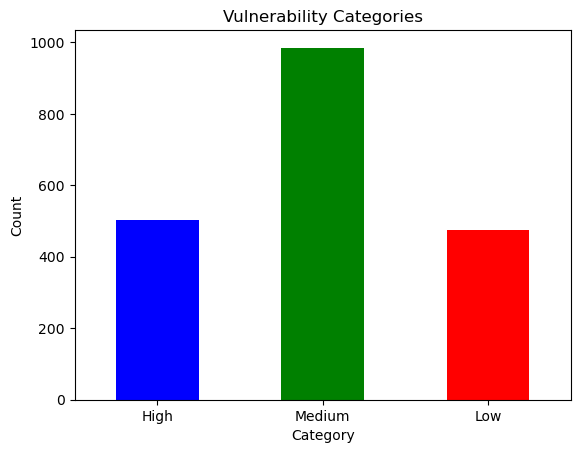

In [29]:
# Count categories
vulnerability_counts = df_vul['Vulnerability Category'].value_counts().sort_index()

# High, Medium, Low
vulnerability_counts = vulnerability_counts[['High', 'Medium', 'Low']]

fig, ax = plt.subplots()
vulnerability_counts.plot(kind='bar', color=['blue', 'green', 'red'], ax=ax)

ax.set_title('Vulnerability Categories')
ax.set_xlabel('Category')
ax.set_ylabel('Count')
plt.xticks(rotation=0)

plt.savefig('vulnerability_cat.png')
plt.show()


### See distribution of Hazard Index and Vulnerability Score

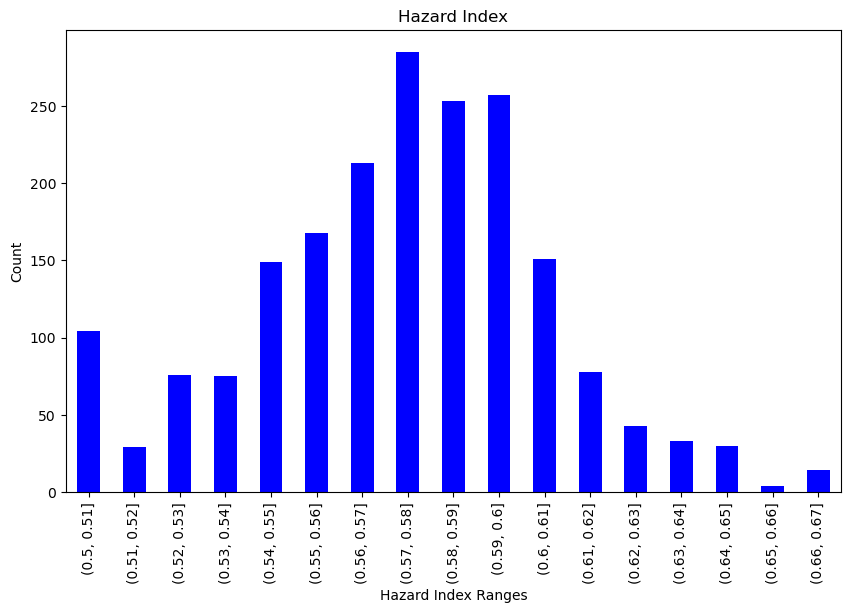

In [30]:
# Use the actual min and max from the data
hazard_min = df_vul['Hazard Index'].min()
hazard_max = df_vul['Hazard Index'].max()

# Define bin width
bin_width = 0.01

# Create bin edges from min to max (inclusive)
bin_edges = np.arange(hazard_min, hazard_max + bin_width, bin_width)

# Create bins for 'Hazard Index'
df_vul['Hazard Index Category'] = pd.cut(df_vul['Hazard Index'], bins=bin_edges)

# Count the occurrences in each bin
hazard_index_counts = df_vul['Hazard Index Category'].value_counts(sort=False).sort_index()

# Plot a bar chart for 'Hazard Index' bins
fig, ax = plt.subplots(figsize=(10, 6))
hazard_index_counts.plot(kind='bar', color='blue', ax=ax)

# Add title and labels for 'Hazard Index'
ax.set_title('Hazard Index')
ax.set_xlabel('Hazard Index Ranges')
ax.set_ylabel('Count')
plt.xticks(rotation=90)

# Save the plot
plt.savefig('hazard_index_range_plot.png')

# Show the plot
plt.show()

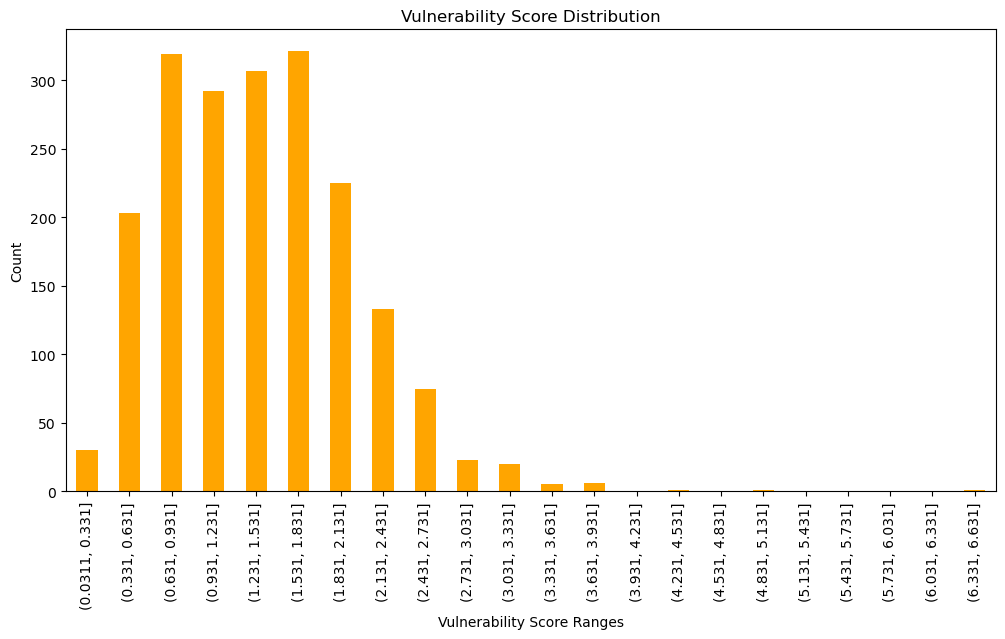

In [31]:
# Use actual min and max values from the data
vul_min = df_vul['Vulnerability Score'].min()
vul_max = df_vul['Vulnerability Score'].max()

# Define bin width (higher for fewer bins)
bin_width = 0.3

# Generate bin edges from min to max
vul_bin_edges = np.arange(vul_min, vul_max + bin_width, bin_width)

# Create the bin category column
df_vul['Vulnerability Score Category'] = pd.cut(df_vul['Vulnerability Score'], bins=vul_bin_edges)

# Count how many fall into each bin
vul_score_counts = df_vul['Vulnerability Score Category'].value_counts(sort=False).sort_index()

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
vul_score_counts.plot(kind='bar', color='orange', ax=ax)

ax.set_title('Vulnerability Score Distribution')
ax.set_xlabel('Vulnerability Score Ranges')
ax.set_ylabel('Count')
plt.xticks(rotation=90)

# Save the plot
plt.savefig('vulnerability_score_range_plot.png')
plt.show()


In [32]:
df_vul.to_csv("vulnerable_roads.csv", index=False)

### Picking top 10 most vulnerable roads

In [33]:
# Sort by Vulnerability Score, highest first
top_vul = df_vul.sort_values(by='Vulnerability Score', ascending=True)

In [34]:
top_10_roads = top_vul.head(11)
print(top_10_roads[['Link no', 'road', 'Zone', 'Vulnerability Score', 'Vulnerability Category']])

      Link no   road        Zone  Vulnerability Score Vulnerability Category
241    N3-13L     N3  Mymensingh             0.031134                   High
242    N3-13R     N3  Mymensingh             0.031265                   High
1000   R814-2   R814       Dhaka             0.049498                   High
469     N7-11     N7      Khulna             0.090865                   High
440     N6-20     N6    Rajshahi             0.109774                   High
498    N703-2   N703      Khulna             0.139346                   High
754    R249-2   R249      Sylhet             0.163132                   High
613    R110-3   R110       Dhaka             0.176106                   High
655    R141-7   R141     Cumilla             0.179882                   High
796    R312-2   R312       Dhaka             0.189375                   High
1190  Z1205-1  Z1205     Cumilla             0.199713                   High


### Plotting vulnerable roads

In [35]:
!pip install contextily

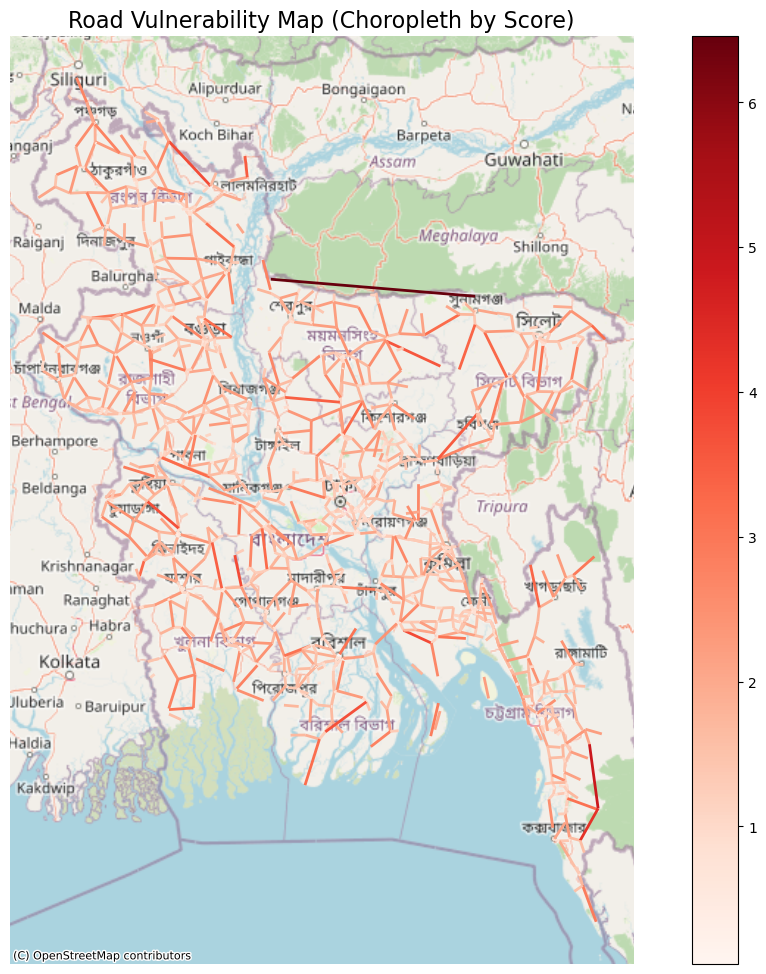

In [36]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
from shapely import wkt
from shapely.geometry import LineString
import contextily as ctx

# Load and prepare data
df = pd.read_csv("vulnerable_roads.csv")
df = df[df['start_geometry'].notna() & df['end_geometry'].notna()]
df['start_geom'] = df['start_geometry'].apply(wkt.loads)
df['end_geom'] = df['end_geometry'].apply(wkt.loads)

# Create connecting lines
df['connect_line'] = [
    LineString([start.centroid, end.centroid])
    for start, end in zip(df['start_geom'], df['end_geom'])
]

# Merge vulnerability data if it's separate
# Assuming `top_vul` has 'Link no', 'Vulnerability Score' etc.
# full_df = df.merge(top_vul, on='Link no')  # Uncomment if needed

gdf = gpd.GeoDataFrame(df, geometry='connect_line', crs="EPSG:4326").to_crs(epsg=3857)

# Plot choropleth by vulnerability score
fig, ax = plt.subplots(figsize=(12, 10))
gdf.plot(column='Vulnerability Score', ax=ax, legend=True,
         cmap='Reds', linewidth=2)

ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
ax.set_title("Road Vulnerability Map (Choropleth by Score)", fontsize=16)
ax.axis('off')
plt.tight_layout()
plt.show()

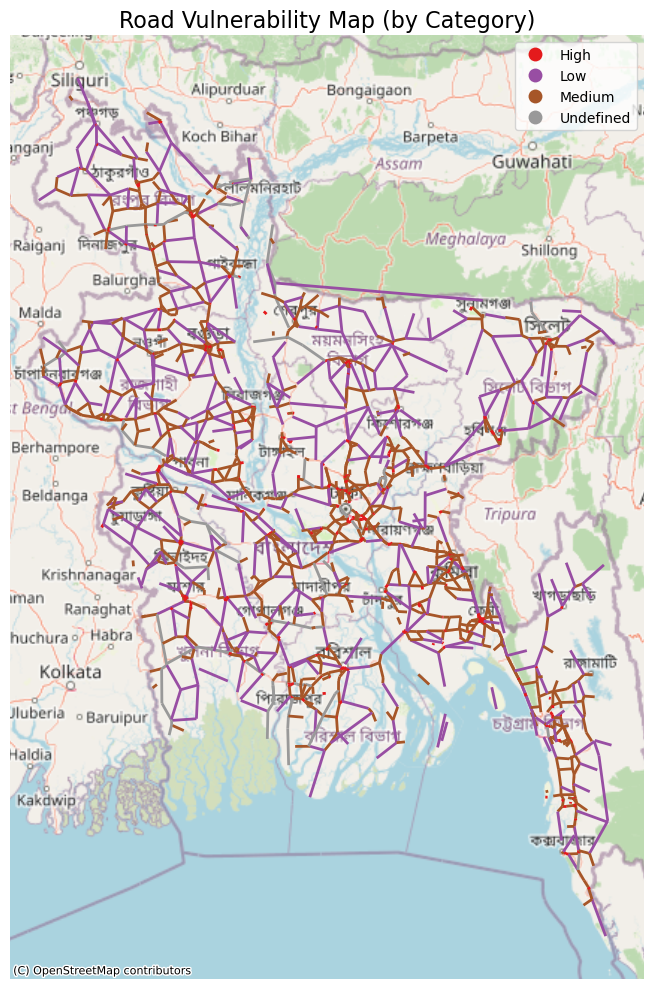

In [37]:
fig, ax = plt.subplots(figsize=(12, 10))
gdf.plot(column='Vulnerability Category', ax=ax, legend=True,
         cmap='Set1', linewidth=2)

ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
ax.set_title("Road Vulnerability Map (by Category)", fontsize=16)
ax.axis('off')
plt.tight_layout()
plt.show()
